In [1]:
pip install pymysql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymysql import connect
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
database = connect(host = 'localhost', 
                  user = 'root',
                  password = 'Ceaservyshu7&',
                  database = 'capstone_project')

In [4]:
cur = database.cursor()

In [5]:
query = 'SELECT * FROM personal_loan_dti;'

cur.execute(query)

393

In [6]:
df = pd.read_sql(query, database)

C:\Users\vyshn\AppData\Local\Temp\ipykernel_7000\305042412.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, database)


In [7]:
df.head()

loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0     1387  Female   38  30-40 years         Single                 1   
1      998    Male   64  >= 60 years        Widowed                 4   
2      100    Male   63  >= 60 years       Divorced                 3   
3     1382    Male   39  30-40 years        Married                 2   
4     1549    Male   46  40-50 years        Married                 3   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor      Government                 Urban             Owned   
2          Bachelor      Government                 Urban            Rented   
3            Master        Salaried                 Urban            Rented   
4          Bachelor   Self-employed                 Urban             Owned   

   ...  loan_amount Loan_bins  loan_term_yrs   loan_purpose  approval_status  \
0  ...      3338820     0-1Cr             15  Personal Loan         Approved   
1  ...      1078278     0-1Cr              5  Personal Loan         Approved   
2  ...       706568     0-1Cr             15  Personal Loan         Approved   
3  ...      4978662     0-1Cr             15  Personal Loan         Approved   
4  ...       608819     0-1Cr             10  Personal Loan         Rejected   

   previous_loan_experience credit_history  cibil_score  \
0                      None           Good          677   
1                      None           Poor          435   
2                  Negative           Poor          489   
3                      None           Good          693   
4                      None           Good          727   

               cibil_scorebins  property_ownership  
0  650-699: Satisfactory Score              Rented  
1     600-649: Doubtfull Score               Owned  
2     600-649: Doubtfull Score              Rented  
3  650-699: Satisfactory Score               Owned  
4         700- 749: Good Score              Rented  

[5 rows x 31 columns]

In [8]:
df.tail()

loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
388      746  Female   39  30-40 years        Widowed                 4   
389     1508  Female   36  30-40 years         Single                 3   
390     1255  Female   62  >= 60 years        Married                 1   
391     1577    Male   46  40-50 years        Married                 3   
392      736  Female   36  30-40 years         Single                 4   

    educational_level employment_type geographical_location type_of_residence  \
388            Master        Salaried                 Urban             Owned   
389          Bachelor        Salaried                 Rural            Rented   
390          Bachelor      Unemployed                 Urban            Rented   
391            Master        Salaried                 Urban      With Parents   
392            Master      Government                 Urban            Rented   

     ...  loan_amount Loan_bins  loan_term_yrs   loan_purpose  \
388  ...      3966172     0-1Cr             30  Personal Loan   
389  ...      4097377     0-1Cr              5  Personal Loan   
390  ...      1055912     0-1Cr             30  Personal Loan   
391  ...      3181744     0-1Cr             20  Personal Loan   
392  ...      1549537     0-1Cr             15  Personal Loan   

     approval_status  previous_loan_experience credit_history  cibil_score  \
388         Approved                      None      Excellent          866   
389         Rejected                      None           Poor          507   
390         Approved                  Positive           Poor          378   
391         Rejected                  Negative      Very Good          773   
392         Approved                      None           Good          709   

              cibil_scorebins  property_ownership  
388  750-900: Excellent Score               Owned  
389  600-649: Doubtfull Score              Rented  
390  600-649: Doubtfull Score               Owned  
391  750-900: Excellent Score               Owned  
392      700- 749: Good Score              Rented  

[5 rows x 31 columns]

In [9]:
#Calculate the remaining salary
df['Remaining_Salary'] = df['MonthlySalary'] - df['monthly_obligations']

# Drop rows where the remaining salary is negative and the applicant is unemployed and the loan is approved
df = df[~((df['Remaining_Salary'] < 0) & (df['approval_status'] == 'Approved') & (df['employment_type'] == 'Unemployed'))]

# Drop rows where the employment type is 'Unemployed' and the loan is approved
df = df[~((df['employment_type'] == 'Unemployed') & (df['approval_status'] == 'Approved'))]

# Drop the 'Remaining_Salary' column if it's no longer needed
df = df.drop(columns=['Remaining_Salary'])

# Display the first few rows of the updated DataFrame to verify the changes
print("Updated DataFrame after filtering:")
print(df.head())

Updated DataFrame after filtering:
   loan_id  gender  age     AgeGroup marital_status  no_of_dependents  \
0     1387  Female   38  30-40 years         Single                 1   
1      998    Male   64  >= 60 years        Widowed                 4   
2      100    Male   63  >= 60 years       Divorced                 3   
3     1382    Male   39  30-40 years        Married                 2   
4     1549    Male   46  40-50 years        Married                 3   

  educational_level employment_type geographical_location type_of_residence  \
0             Ph.D.        Salaried                 Urban             Owned   
1          Bachelor      Government                 Urban             Owned   
2          Bachelor      Government                 Urban            Rented   
3            Master        Salaried                 Urban            Rented   
4          Bachelor   Self-employed                 Urban             Owned   

   ...  loan_amount Loan_bins  loan_term_yrs   loan

In [10]:
df.describe()

loan_id         age  no_of_dependents  income_annum  MonthlySalary  \
count   382.000000  382.000000        382.000000  3.820000e+02     382.000000   
mean    965.005236   40.654450          1.979058  1.164858e+06   97071.523560   
std     579.811445   13.595235          1.432499  4.725376e+05   39378.136655   
min       2.000000   18.000000          0.000000  3.019030e+05   25159.000000   
25%     478.500000   29.000000          1.000000  7.583915e+05   63199.500000   
50%     895.000000   41.000000          2.000000  1.203042e+06  100253.500000   
75%    1456.750000   52.000000          3.000000  1.546918e+06  128909.750000   
max    1992.000000   64.000000          4.000000  1.973614e+06  164468.000000   

       monthly_obligations         DTI  savings_account_balance  \
count           382.000000  382.000000               382.000000   
mean          24407.107330   31.459686            244592.421466   
std           14315.920193   26.994171            141062.398265   
min             345.000000    0.288000             10434.000000   
25%           11603.500000   12.544950            119572.500000   
50%           23474.500000   25.473600            244704.000000   
75%           37545.500000   38.968375            358352.000000   
max           49914.000000  154.142400            498393.000000   

       investment_portfolio_value  insurance_policies   loan_amount  \
count                  382.000000        3.820000e+02  3.820000e+02   
mean                498131.397906        2.421533e+06  2.556830e+06   
std                 283731.862478        1.432334e+06  1.432211e+06   
min                   1425.000000        7.722400e+04  9.909400e+04   
25%                 274937.000000        1.158742e+06  1.283760e+06   
50%                 492339.000000        2.291970e+06  2.498028e+06   
75%                 730506.500000        3.623464e+06  3.877804e+06   
max                 992497.000000        4.994634e+06  4.978662e+06   

       loan_term_yrs  cibil_score  
count     382.000000   382.000000  
mean       17.382199   662.774869  
std         8.600525   163.774657  
min         5.000000     0.000000  
25%        10.000000   627.000000  
50%        20.000000   712.000000  
75%        25.000000   763.500000  
max        30.000000   899.000000

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 392
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_id                     382 non-null    int64  
 1   gender                      382 non-null    object 
 2   age                         382 non-null    int64  
 3   AgeGroup                    382 non-null    object 
 4   marital_status              382 non-null    object 
 5   no_of_dependents            382 non-null    int64  
 6   educational_level           382 non-null    object 
 7   employment_type             382 non-null    object 
 8   geographical_location       382 non-null    object 
 9   type_of_residence           382 non-null    object 
 10  income_annum                382 non-null    int64  
 11  income_buckets              382 non-null    object 
 12  MonthlySalary               382 non-null    float64
 13  monthly_obligations         382 non-null

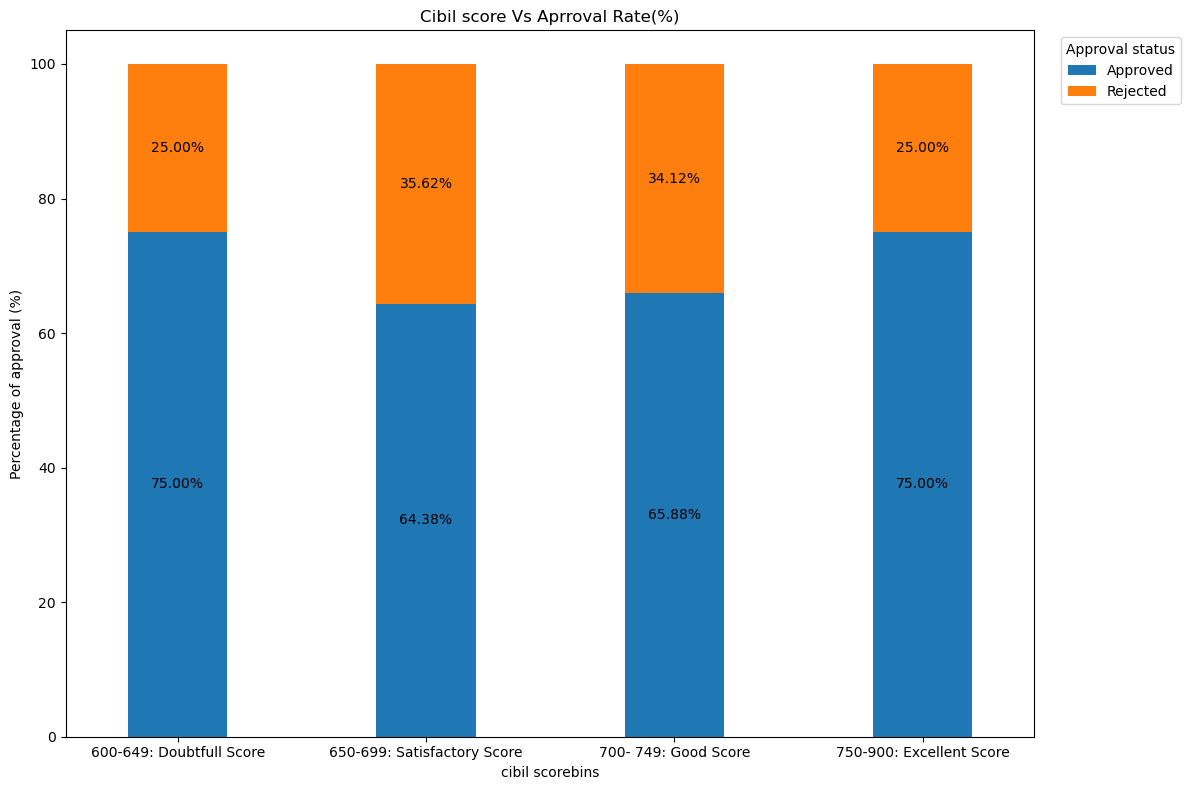

In [13]:
# Approval Rate Vs CIBIL Score bins
approval_rates = df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()
normalized_data=approval_rates.div(approval_rates.sum(axis=1),axis=0)*100
ax=normalized_data.plot(kind='bar',stacked=True,figsize=(12,8),width=0.4)


# Add data labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.xlabel('cibil scorebins')
plt.ylabel('Percentage of approval (%)')
plt.title('Cibil score Vs Aprroval Rate(%)')
plt.xticks(rotation=360)
        
# Adding the legend
plt.legend(title='Approval status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

Approval Status vs Income Buckets:
  income_buckets approval_status  counts
0      0-5 Lakhs        Approved      30
1      0-5 Lakhs        Rejected      11
2    10-15 Lakhs        Approved      89
3    10-15 Lakhs        Rejected      37
4    15-20 Lakhs        Approved      76
5    15-20 Lakhs        Rejected      34
6     5-10 Lakhs        Approved      76
7     5-10 Lakhs        Rejected      29


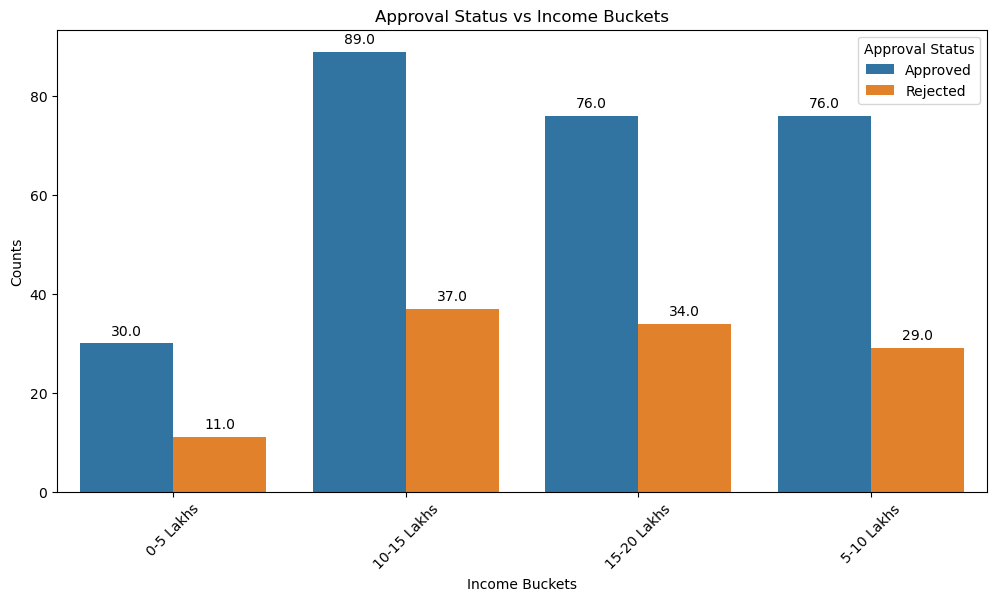

In [14]:
# Overall Calculations
# Group by income buckets and approval status to count the occurrences
approval_vs_income = df.groupby(['income_buckets', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Income Buckets:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='income_buckets', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Income Buckets')
plt.xlabel('Income Buckets')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Savings_bins:
  Savings_bins approval_status  counts
0         0-1L        Approved      53
1         0-1L        Rejected      23
2        1L-2L        Approved      51
3        1L-2L        Rejected      27
4        2L-3L        Approved      59
5        2L-3L        Rejected      19
6        3L-4L        Approved      59
7        3L-4L        Rejected      24
8        4L-5L        Approved      49
9        4L-5L        Rejected      18


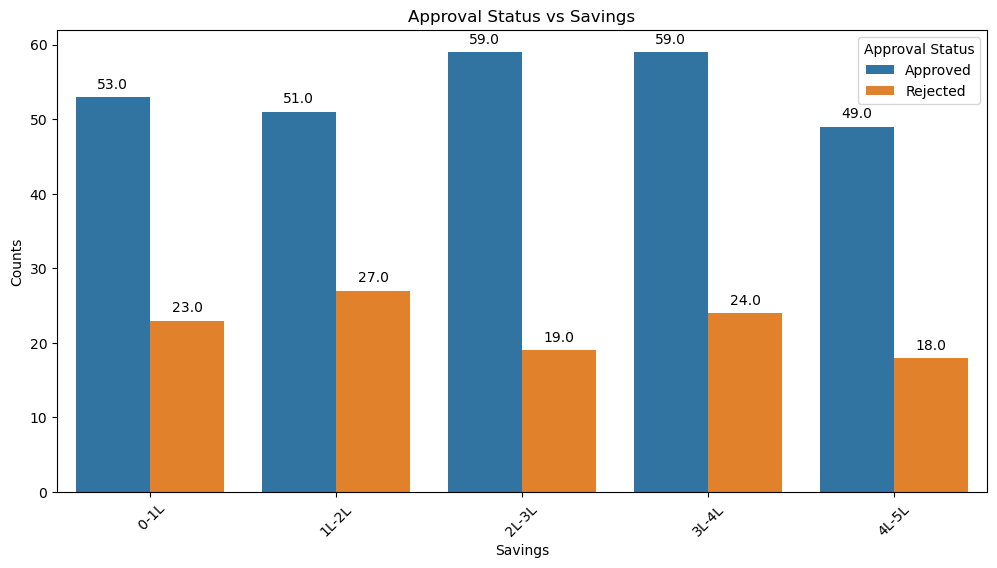

In [15]:
# Overall Calculations
# Group by Savings bins and approval status to count the occurrences
approval_vs_income = df.groupby(['Savings_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Savings_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Savings_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Savings')
plt.xlabel('Savings')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs investment_bins:
  investment_bins approval_status  counts
0            0-2L        Approved      41
1            0-2L        Rejected      28
2           2L-4L        Approved      52
3           2L-4L        Rejected      30
4           4L-6L        Approved      70
5           4L-6L        Rejected      18
6           6L-8L        Approved      56
7           6L-8L        Rejected      17
8          8L-10L        Approved      52
9          8L-10L        Rejected      18


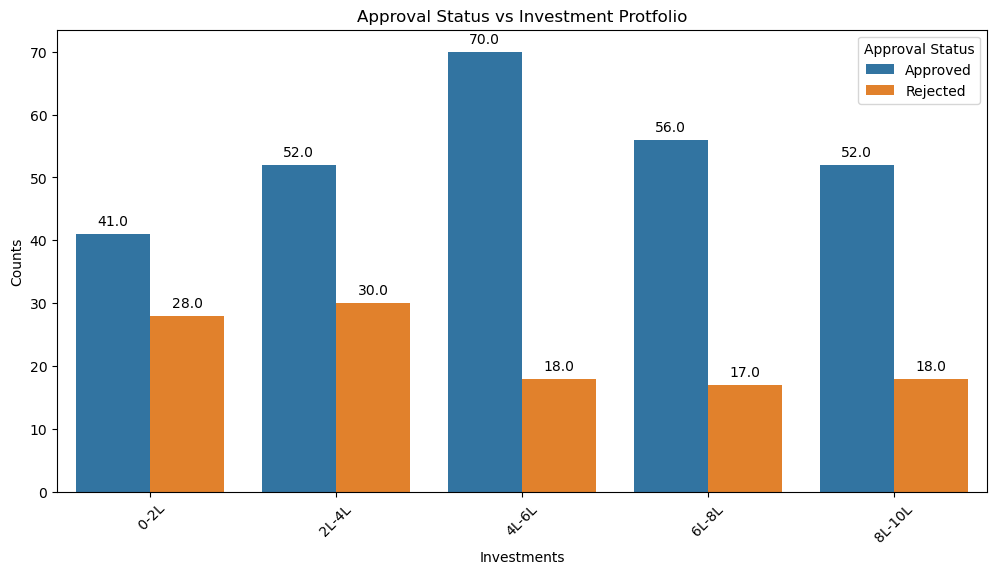

In [16]:
# Overall Calculations
# Group by investments and approval status to count the occurrences
approval_vs_income = df.groupby(['investment_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs investment_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='investment_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Investment Protfolio')
plt.xlabel('Investments')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs insurance_bins:
  insurance_bins approval_status  counts
0          0-10L        Approved      52
1          0-10L        Rejected      20
2        10L-20L        Approved      55
3        10L-20L        Rejected      37
4        20L-30L        Approved      59
5        20L-30L        Rejected      21
6        30L-40L        Approved      46
7        30L-40L        Rejected      18
8        40L-50L        Approved      59
9        40L-50L        Rejected      15


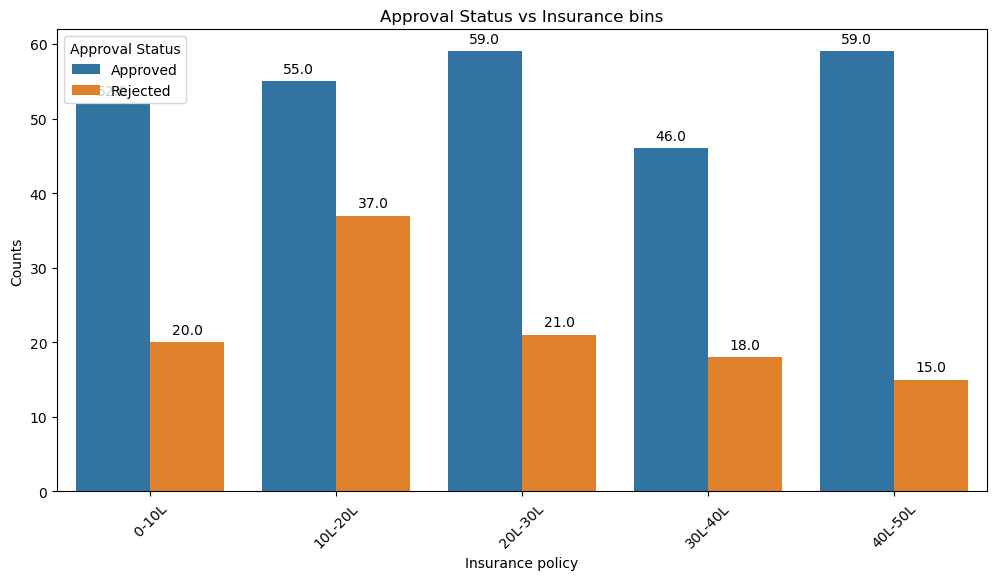

In [17]:
# Overall Calculations
# Group by insurance and approval status to count the occurrences
approval_vs_income = df.groupby(['insurance_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs insurance_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='insurance_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Insurance bins')
plt.xlabel('Insurance policy')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Loan_bins:
  Loan_bins approval_status  counts
0     0-1Cr        Approved     271
1     0-1Cr        Rejected     111


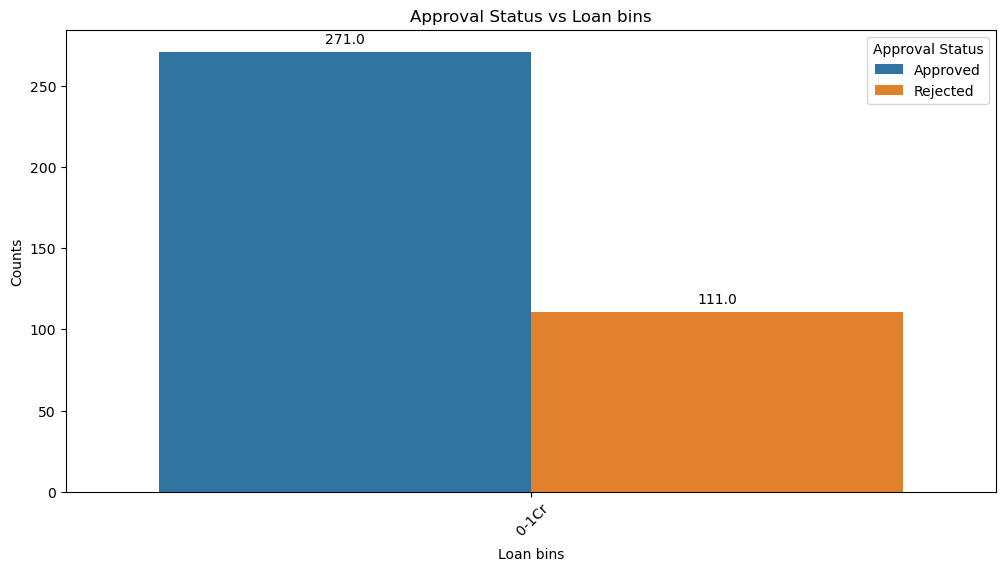

In [18]:
# Overall Calculations
# Group by Loan bins and approval status to count the occurrences
approval_vs_income = df.groupby(['Loan_bins', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Loan_bins:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Loan_bins', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Loan bins')
plt.xlabel('Loan bins')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs loan_term_yrs:
    loan_term_yrs approval_status  counts
0               5        Approved      44
1               5        Rejected      26
2              10        Approved      37
3              10        Rejected      18
4              15        Approved      47
5              15        Rejected      18
6              20        Approved      62
7              20        Rejected      11
8              25        Approved      38
9              25        Rejected      15
10             30        Approved      43
11             30        Rejected      23


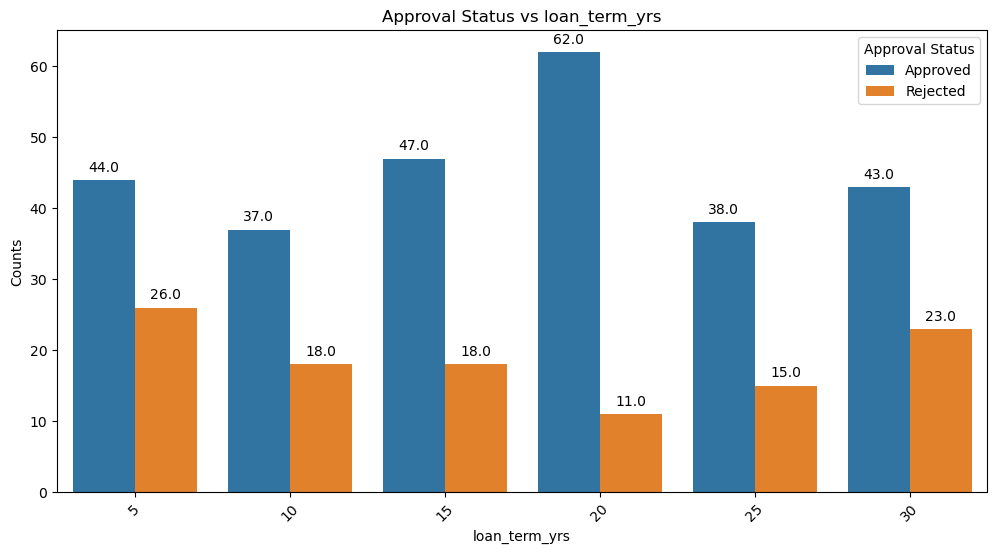

In [19]:
# Overall Calculations
# Group by Term and approval status to count the occurrences
approval_vs_income = df.groupby(['loan_term_yrs', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs loan_term_yrs:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='loan_term_yrs', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs loan_term_yrs')
plt.xlabel('loan_term_yrs')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs Previous loan exp:
  previous_loan_experience approval_status  counts
0                 Negative        Approved      19
1                 Negative        Rejected      13
2                     None        Approved     141
3                     None        Rejected      57
4                 Positive        Approved     111
5                 Positive        Rejected      41


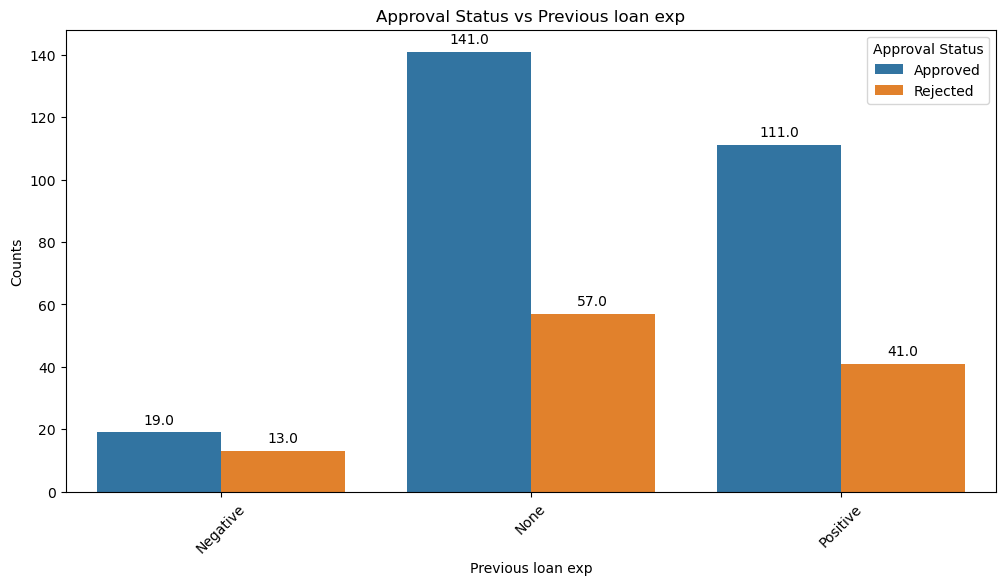

In [20]:
# Group by previous_loan_experience and approval status to count the occurrences
approval_vs_income = df.groupby(['previous_loan_experience', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs Previous loan exp:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='previous_loan_experience', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs Previous loan exp')
plt.xlabel('Previous loan exp')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs credit history:
   credit_history approval_status  counts
0       Excellent        Approved      33
1       Excellent        Rejected       4
2            Fair        Approved      15
3            Fair        Rejected      11
4            Good        Approved     103
5            Good        Rejected      55
6           NA/NH        Approved       7
7            Poor        Approved      56
8            Poor        Rejected      15
9       Very Good        Approved      57
10      Very Good        Rejected      26


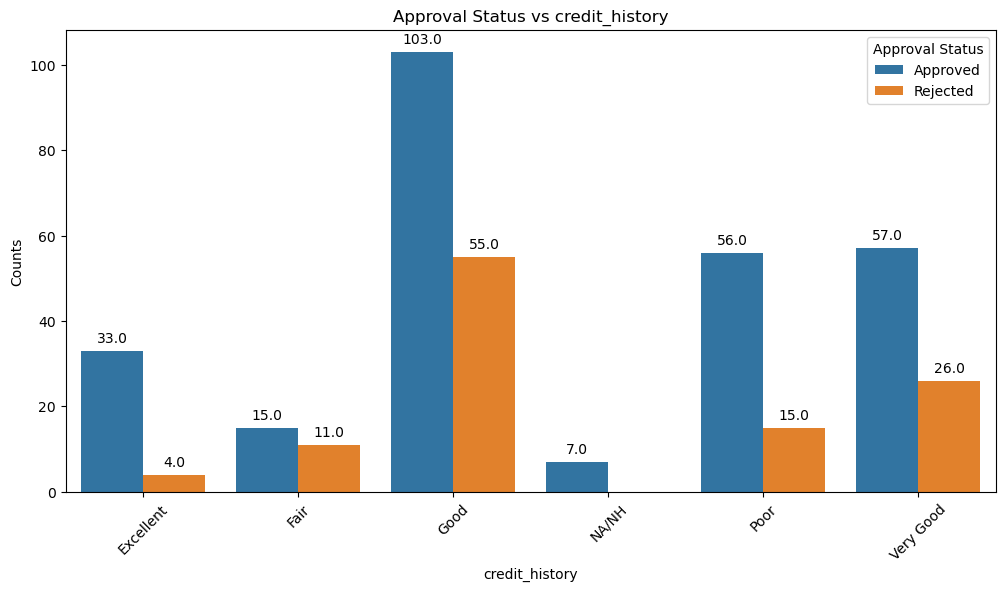

In [21]:
# Group by credit_history and approval status to count the occurrences
approval_vs_income = df.groupby(['credit_history', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs credit history:")
print(approval_vs_income)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='credit_history', y='counts', hue='approval_status', data=approval_vs_income)
plt.title('Approval Status vs credit_history')
plt.xlabel('credit_history')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Demographics

Total number of applicants gender-wise:
   gender  counts
0  Female     206
1    Male     172
2   Other       4


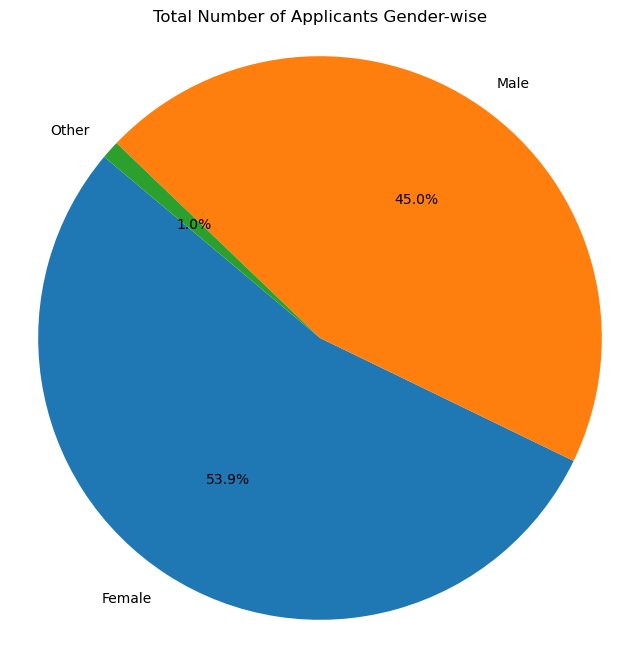

In [22]:
# Group by gender and count the occurrences
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'counts']

# Display the result
print("Total number of applicants gender-wise:")
print(gender_counts)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts['counts'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=140)
plt.title('Total Number of Applicants Gender-wise')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Approval Status vs AgeGroup:
       AgeGroup approval_status  counts
0   20-30 years        Approved      56
1   20-30 years        Rejected      27
2   30-40 years        Approved      58
3   30-40 years        Rejected      27
4   40-50 years        Approved      63
5   40-50 years        Rejected      17
6   50-60 years        Approved      55
7   50-60 years        Rejected      24
8    < 20 years        Approved      14
9    < 20 years        Rejected       2
10  >= 60 years        Approved      25
11  >= 60 years        Rejected      14


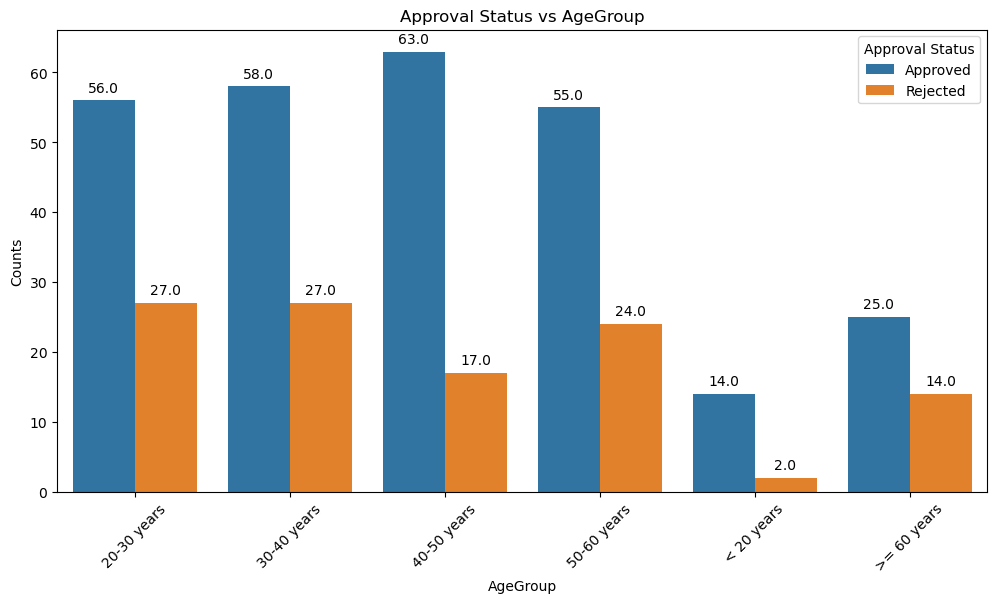

In [46]:
# Group by AgeGroup and approval status to count the occurrences
approval_vs_Age = df.groupby(['AgeGroup', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs AgeGroup:")
print(approval_vs_Age)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='AgeGroup', y='counts', hue='approval_status', data=approval_vs_Age)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('AgeGroup')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs marital_status:
  marital_status approval_status  counts
0       Divorced        Approved      44
1       Divorced        Rejected      19
2        Married        Approved     145
3        Married        Rejected      51
4         Single        Approved      69
5         Single        Rejected      37
6        Widowed        Approved      13
7        Widowed        Rejected       4


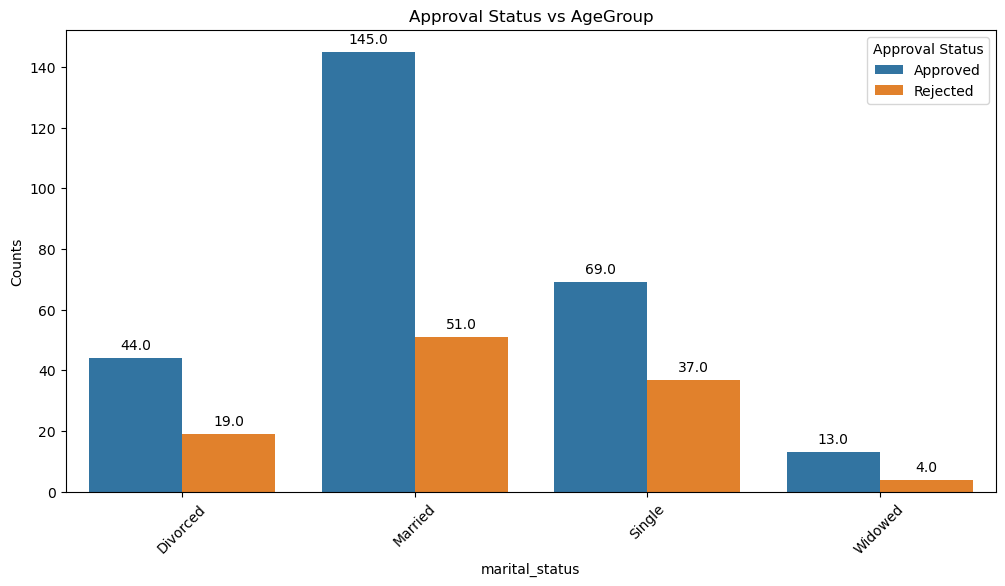

In [47]:
# Group by marital_status and approval status to count the occurrences
approval_vs_maritial = df.groupby(['marital_status', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs marital_status:")
print(approval_vs_maritial )

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='marital_status', y='counts', hue='approval_status', data=approval_vs_maritial)
plt.title('Approval Status vs AgeGroup')
plt.xlabel('marital_status')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs no_of_dependents:
   no_of_dependents approval_status  counts
0                 0        Approved      48
1                 0        Rejected      29
2                 1        Approved      57
3                 1        Rejected      28
4                 2        Approved      52
5                 2        Rejected      16
6                 3        Approved      55
7                 3        Rejected      18
8                 4        Approved      59
9                 4        Rejected      20


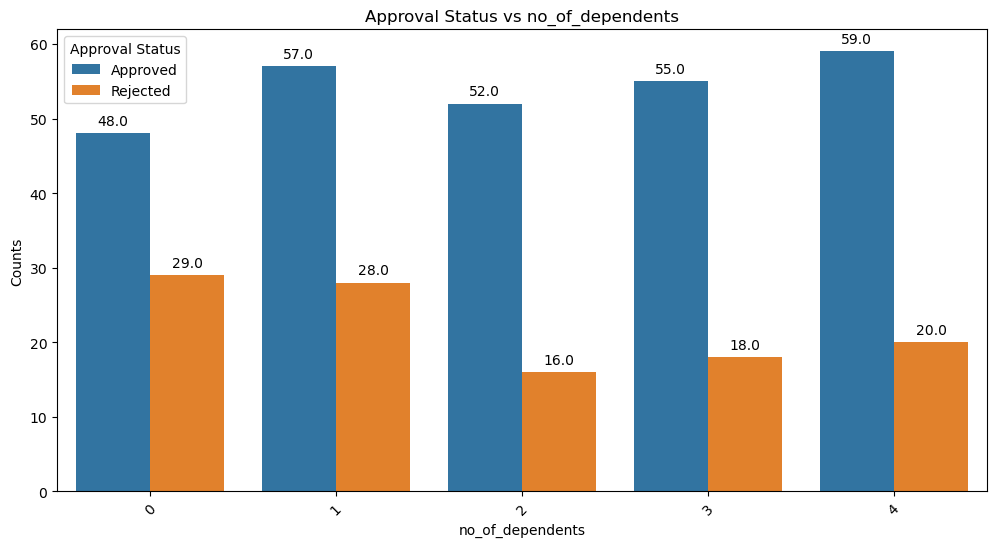

In [48]:
# Group by no_of_dependents and approval status to count the occurrences
approval_vs_dependents = df.groupby(['no_of_dependents', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs no_of_dependents:")
print(approval_vs_dependents)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='no_of_dependents', y='counts', hue='approval_status', data=approval_vs_dependents)
plt.title('Approval Status vs no_of_dependents')
plt.xlabel('no_of_dependents')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()

Approval Status vs educational_level:
  educational_level approval_status  counts
0          Bachelor        Approved     115
1          Bachelor        Rejected      44
2       High School        Approved      24
3       High School        Rejected       5
4            Master        Approved     107
5            Master        Rejected      48
6             Ph.D.        Approved      25
7             Ph.D.        Rejected      14


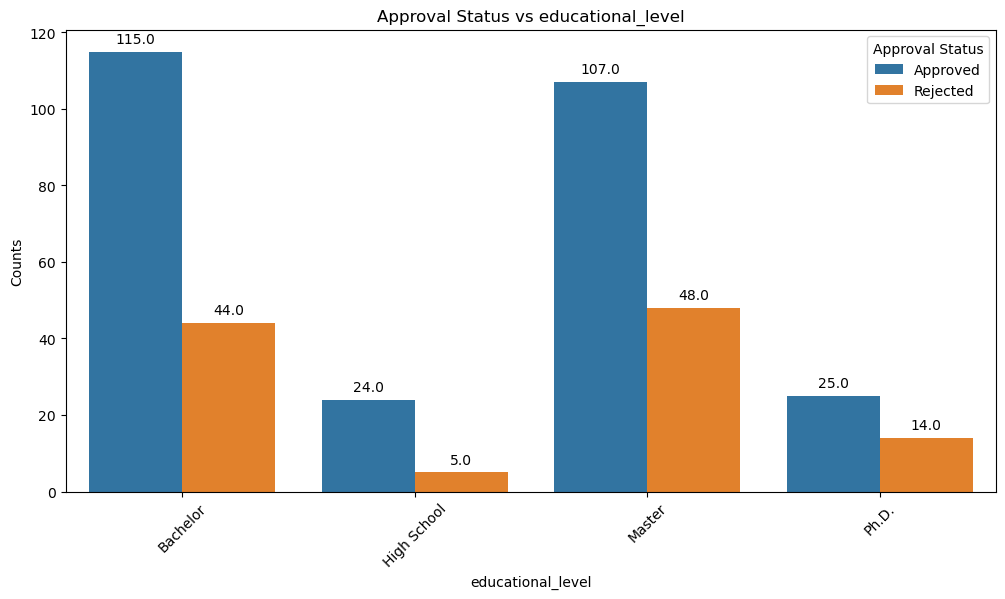

In [49]:

# Group by educational_level and approval status to count the occurrences
approval_vs_edu = df.groupby(['educational_level', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs educational_level:")
print(approval_vs_edu)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='educational_level', y='counts', hue='approval_status', data=approval_vs_edu)
plt.title('Approval Status vs educational_level')
plt.xlabel('educational_level')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs educational_level:
  employment_type approval_status  counts
0      Government        Approved      53
1      Government        Rejected      13
2        Salaried        Approved     138
3        Salaried        Rejected      52
4   Self-employed        Approved      80
5   Self-employed        Rejected      38
6      Unemployed        Rejected       8


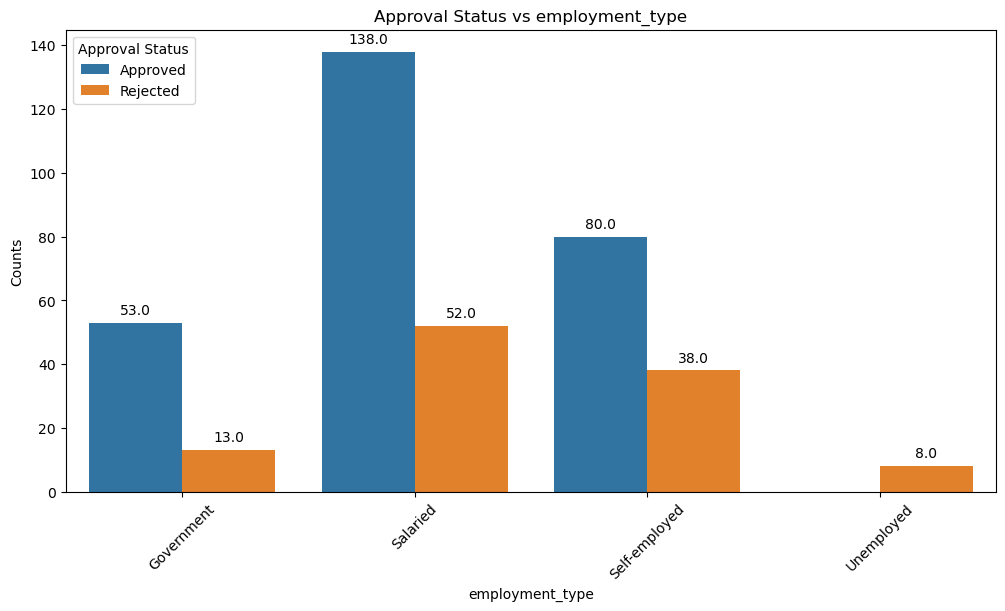

In [50]:
# Group by employment_type and approval status to count the occurrences
approval_vs_emp = df.groupby(['employment_type', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs educational_level:")
print(approval_vs_emp)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='employment_type', y='counts', hue='approval_status', data=approval_vs_emp)
plt.title('Approval Status vs employment_type')
plt.xlabel('employment_type')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs geographical_location:
  geographical_location approval_status  counts
0                 Rural        Approved      79
1                 Rural        Rejected      31
2                 Urban        Approved     192
3                 Urban        Rejected      80


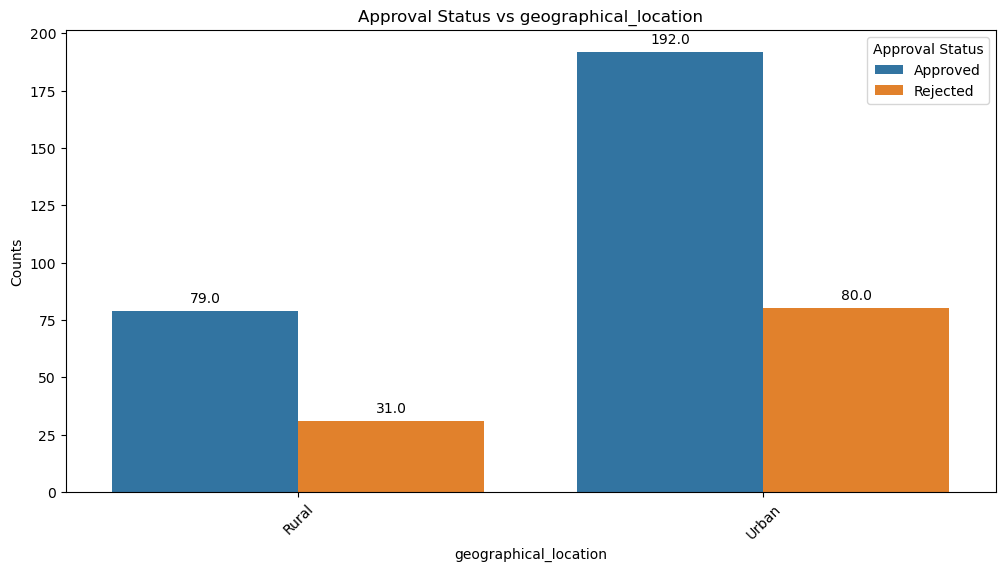

In [51]:

# Group by geographical_location and approval status to count the occurrences
approval_vs_loc = df.groupby(['geographical_location', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs geographical_location:")
print(approval_vs_loc)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='geographical_location', y='counts', hue='approval_status', data=approval_vs_loc)
plt.title('Approval Status vs geographical_location')
plt.xlabel('geographical_location')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs type_of_residence:
  type_of_residence approval_status  counts
0             Owned        Approved     153
1             Owned        Rejected      61
2            Rented        Approved      83
3            Rented        Rejected      32
4      With Parents        Approved      35
5      With Parents        Rejected      18


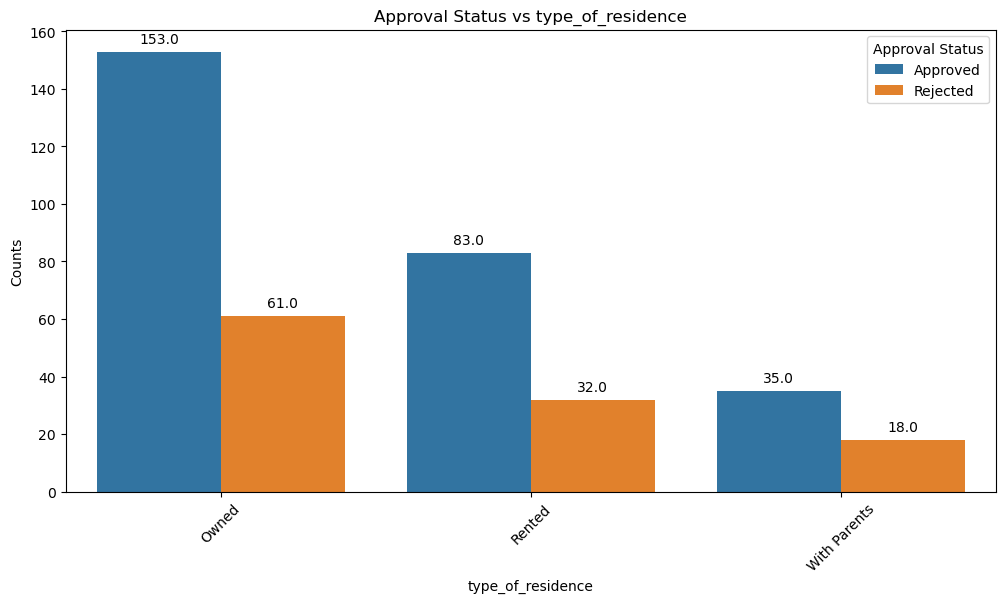

In [52]:
# Group by type_of_residence and approval status to count the occurrences
approval_vs_res = df.groupby(['type_of_residence', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs type_of_residence:")
print(approval_vs_res)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='type_of_residence', y='counts', hue='approval_status', data=approval_vs_res)
plt.title('Approval Status vs type_of_residence')
plt.xlabel('type_of_residence')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


Approval Status vs property_ownership:
  property_ownership approval_status  counts
0              Owned        Approved     197
1              Owned        Rejected      68
2             Rented        Approved      74
3             Rented        Rejected      43


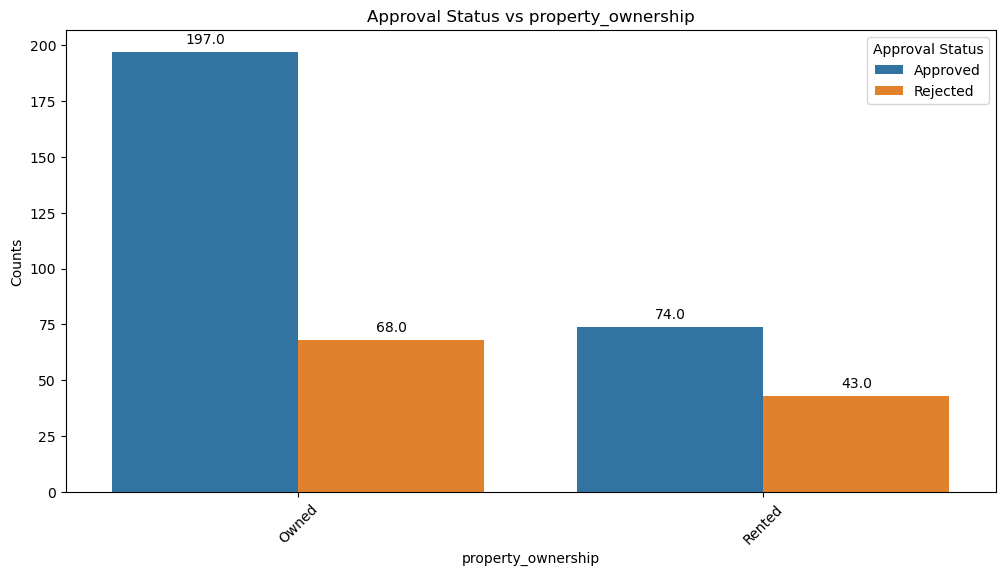

In [54]:

# Group by property_ownership and approval status to count the occurrences
approval_vs_own = df.groupby(['property_ownership', 'approval_status']).size().reset_index(name='counts')

# Display the result
print("Approval Status vs property_ownership:")
print(approval_vs_own)

# Optionally, visualize the results using a bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='property_ownership', y='counts', hue='approval_status', data=approval_vs_own)
plt.title('Approval Status vs property_ownership')
plt.xlabel('property_ownership')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Approval Status')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.show()


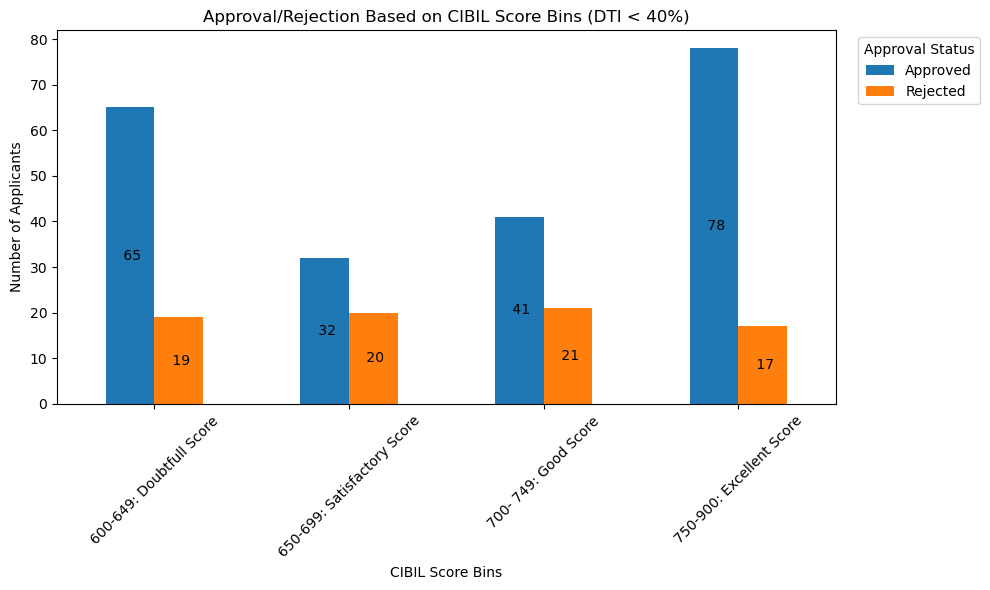

In [31]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] <= 40) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI < 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

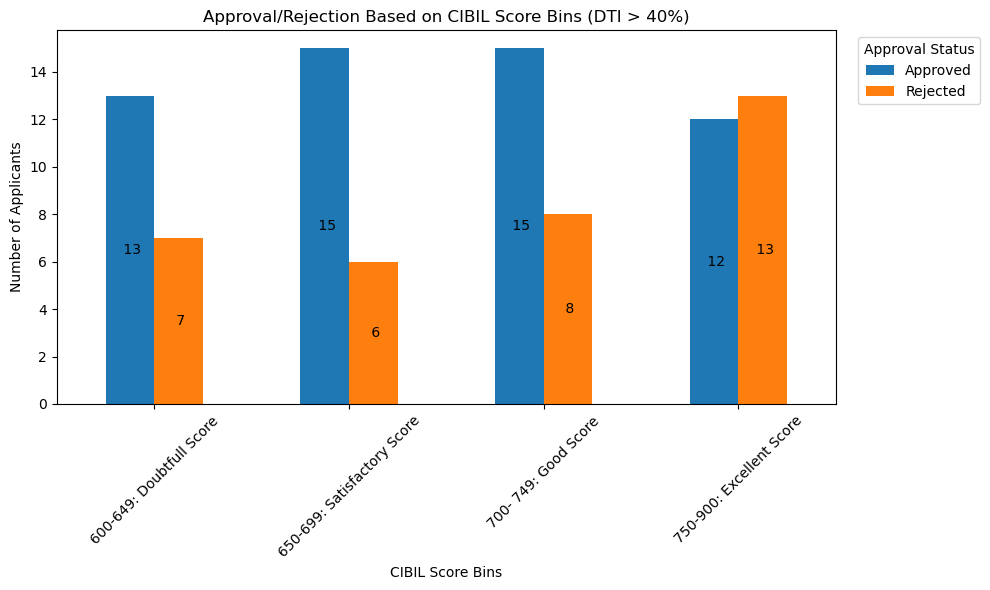

In [32]:
# Filter the DataFrame based on specified CIBIL score bins and DTI ratio
filtered_df = df[(df['DTI'] > 40) & 
                 ((df['cibil_scorebins'] == '600-649: Doubtfull Score') | 
                  (df['cibil_scorebins'] == '650-699: Satisfactory Score') | 
                  (df['cibil_scorebins'] == '700- 749: Good Score') | 
                  (df['cibil_scorebins'] == '750-900: Excellent Score'))]

# Group by CIBIL score bins and approval status
approval_by_score_bins = filtered_df.groupby(['cibil_scorebins', 'approval_status']).size().unstack()

# Plot the bar chart
ax = approval_by_score_bins.plot(kind='bar', stacked=False, figsize=(10, 6))

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height: }', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('CIBIL Score Bins')
plt.ylabel('Number of Applicants')
plt.title('Approval/Rejection Based on CIBIL Score Bins (DTI > 40%)')
plt.xticks(rotation=45)

# Adding the legend
plt.legend(title='Approval Status', bbox_to_anchor=(1.02, 1), loc='upper left')

# Displaying the plot
plt.tight_layout()
plt.show()

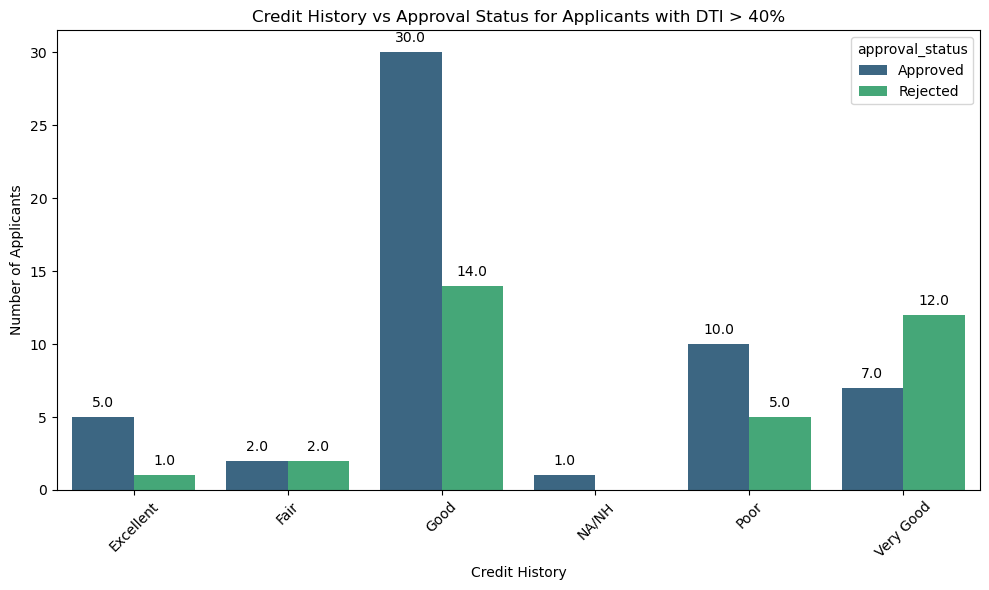

In [34]:
# Filter the DataFrame for DTI > 40
filtered_df = df[df['DTI'] > 40]

# Group by credit history and approval status to get the counts
credit_history_vs_approval = filtered_df.groupby(['credit_history', 'approval_status']).size().reset_index(name='counts')

# Plotting the bar chart for credit history with approval status for applicants with DTI > 42%
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=credit_history_vs_approval, x='credit_history', y='counts', hue='approval_status', palette='viridis')

# Set plot title and labels
plt.title('Credit History vs Approval Status for Applicants with DTI > 40%')
plt.xlabel('Credit History')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

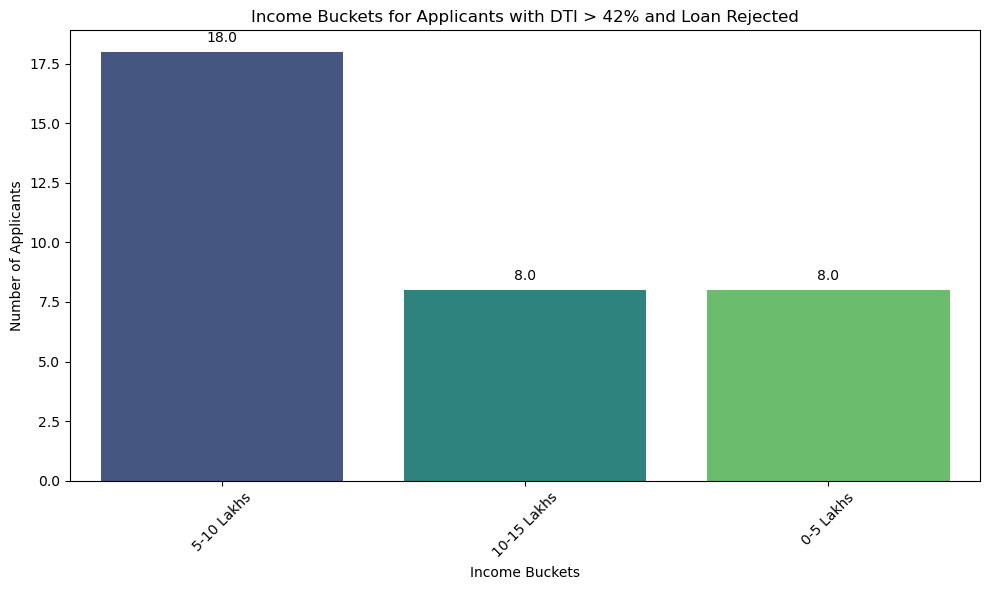

In [35]:
# Filter the DataFrame for DTI > 40 and approval status 'Rejected'
filtered_df = df[(df['DTI'] > 40) & (df['approval_status'] == 'Rejected')]

# Group by income buckets to get the counts
income_vs_counts = filtered_df['income_buckets'].value_counts().reset_index()
income_vs_counts.columns = ['income_buckets', 'counts']

# Plotting the bar chart for income buckets
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=income_vs_counts, x='income_buckets', y='counts', palette='viridis')

# Set plot title and labels
plt.title('Income Buckets for Applicants with DTI > 42% and Loan Rejected')
plt.xlabel('Income Buckets')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

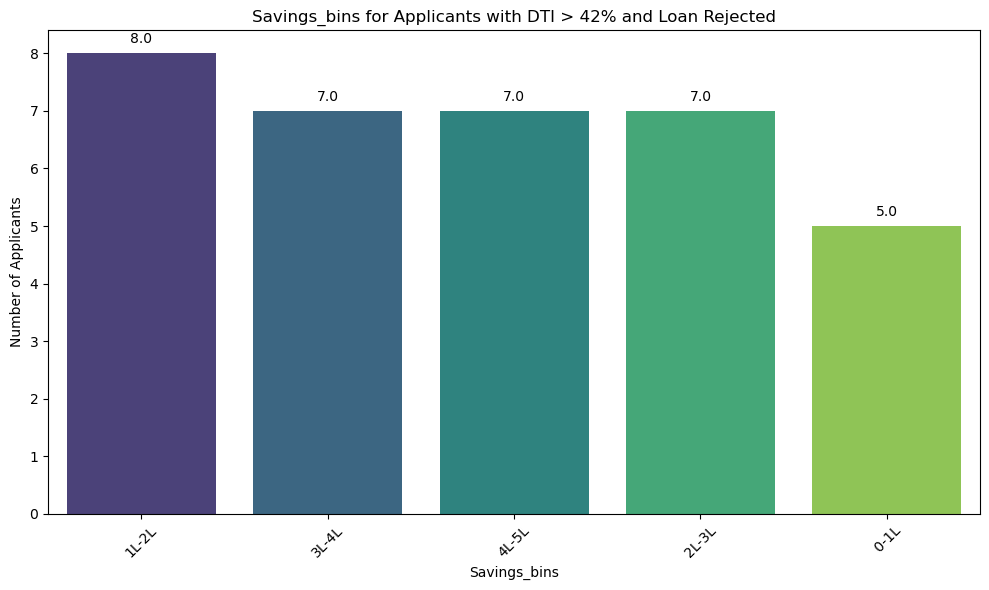

In [43]:
# Filter the DataFrame for DTI > 40 and approval status 'Rejected'
filtered_df = df[(df['DTI'] > 40) & (df['approval_status'] == 'Rejected')]

# Group by income buckets to get the counts
income_vs_counts = filtered_df['Savings_bins'].value_counts().reset_index()
income_vs_counts.columns = ['Savings_bins', 'counts']

# Plotting the bar chart for income buckets
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=income_vs_counts, x='Savings_bins', y='counts', palette='viridis')

# Set plot title and labels
plt.title('Savings_bins for Applicants with DTI > 42% and Loan Rejected')
plt.xlabel('Savings_bins')
plt.ylabel('Number of Applicants')
plt.xticks(rotation=45)

# Adding data labels to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     xytext=(0, 5), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

Correlation Matrix:
                             DTI  MonthlySalary  loan_amount  \
DTI                     1.000000      -0.578316    -0.065481   
MonthlySalary          -0.578316       1.000000     0.117436   
loan_amount            -0.065481       0.117436     1.000000   
credit_history_encoded -0.003093      -0.052160     0.031406   

                        credit_history_encoded  
DTI                                  -0.003093  
MonthlySalary                        -0.052160  
loan_amount                           0.031406  
credit_history_encoded                1.000000  


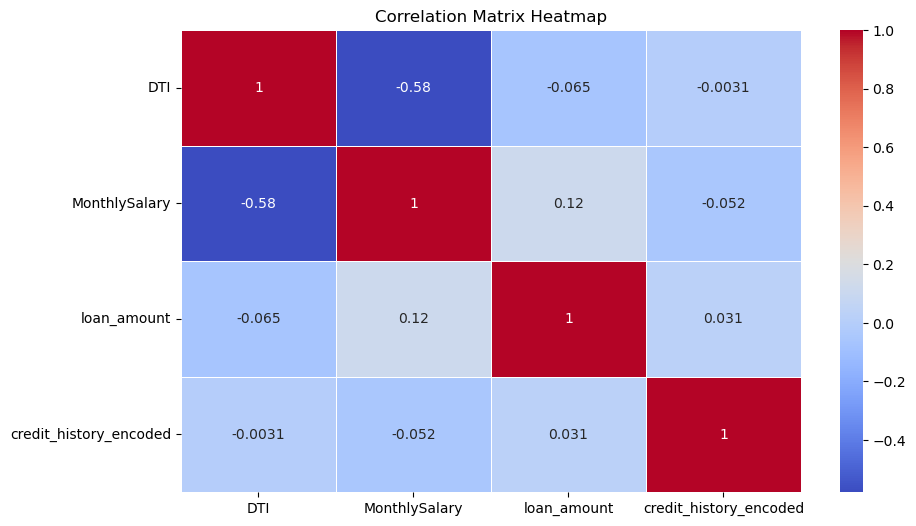

In [44]:

from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Assuming df is your DataFrame containing loan information
# Step 1: Prepare the data (Optional: filter for rejected applications)
# Uncomment the line below if you want to filter for rejected applications
# df = df[df['approval_status'] == 'Rejected']

# Step 2: Encode categorical features
# Encode 'credit_history' (example: Good = 1, Bad = 0, etc.)
le = LabelEncoder()
df['credit_history_encoded'] = le.fit_transform(df['credit_history'])

# Step 3: Select relevant features for correlation analysis
features = ['DTI', 'MonthlySalary', 'loan_amount', 'credit_history_encoded']

# Step 4: Calculate correlation matrix
correlation_matrix = df[features].corr()

# Step 5: Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 6: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Hypothesis Testing

In [45]:
import pandas as pd
from scipy.stats import ttest_ind
# Split the data into approved and rejected applicants based on approval status
approved_df = df[df['approval_status'] == 'Approved']
rejected_df = df[df['approval_status'] == 'Rejected']

# Extract DTI values for each group
dti_approved = approved_df['DTI']
dti_rejected = rejected_df['DTI']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(dti_approved, dti_rejected, equal_var=False)

# Display the results
print(f"T-Test Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in mean DTI between approved and rejected applicants.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in mean DTI between approved and rejected applicants.")


T-Test Statistic: -1.0820789106951278
P-Value: 0.28058225119471714
Fail to reject the null hypothesis: There is no significant difference in mean DTI between approved and rejected applicants.
